In [1]:
import pandas as pd

# Load the dataset (assuming it's in CSV format)
data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(data_url)

# Explore the first few rows of the data to get an overview
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print("Titanic Data Size  :" ,titanic.size)
print("Titanic Data Shape :" ,titanic.shape)

titanic.describe()

Titanic Data Size  : 10692
Titanic Data Shape : (891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# visualization of data


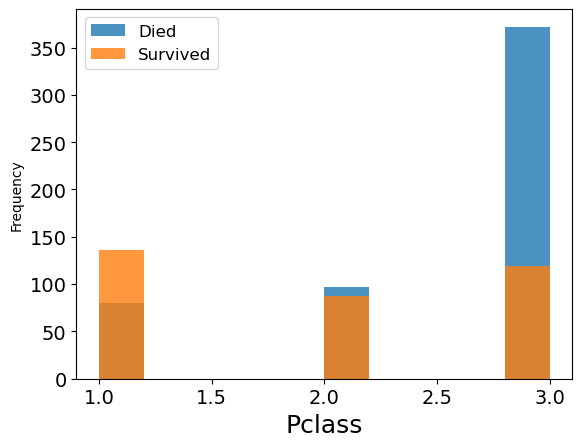

In [6]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = titanic.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

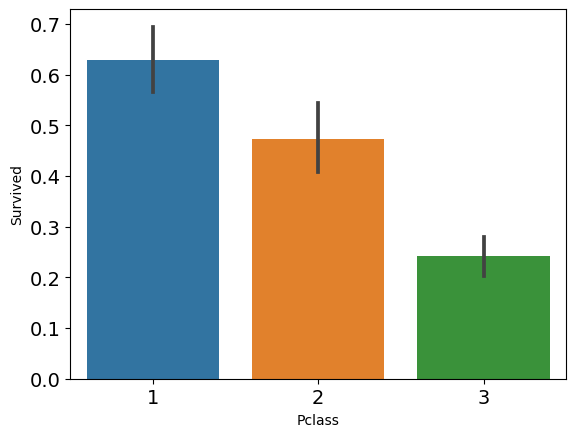

In [7]:
sns.barplot(x='Pclass', y='Survived', data=titanic);

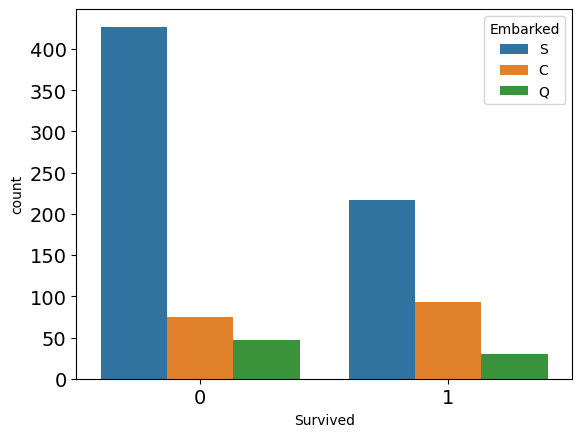

In [8]:
sns.countplot( x='Survived', data=titanic, hue="Embarked");

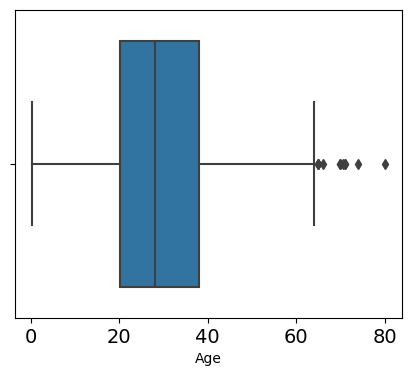

In [9]:
f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x=titanic["Age"])
plt.show()

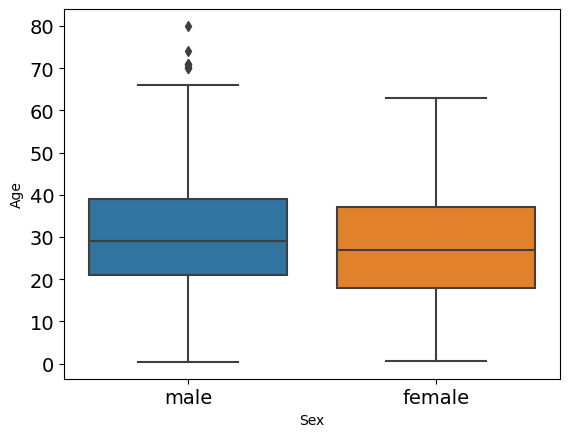

In [10]:
sns.boxplot(x='Sex', y = 'Age',data= titanic)
plt.show()

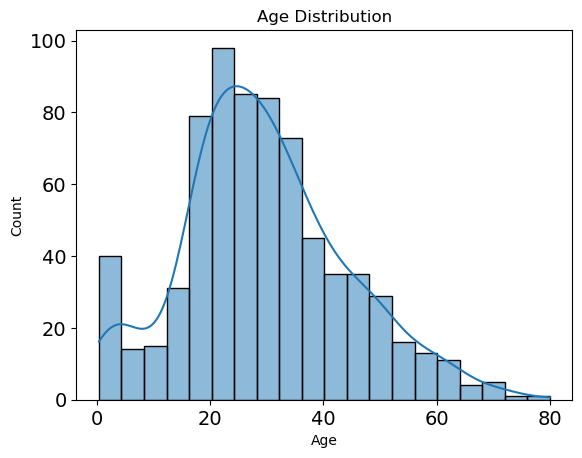

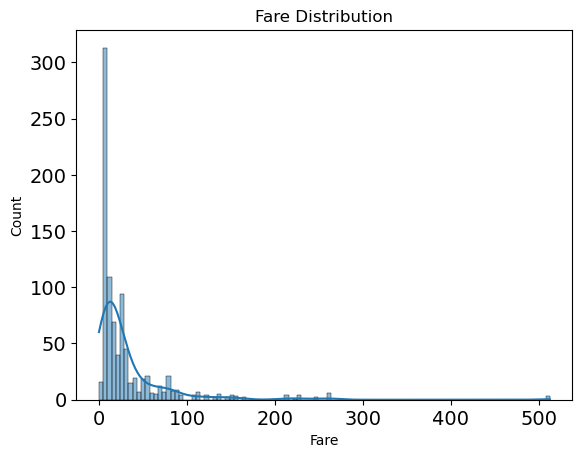

In [11]:
# Clearer histogram plots for the Age and  Fare columns
sns.histplot(x='Age', data=titanic, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(x='Fare', data=titanic, kde=True)
plt.title('Fare Distribution')
plt.show()

# data pre-processing

In [12]:
## Finding the Null value in data
titanic.isnull().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [14]:
missing(titanic)

,Missing_Number,Missing_Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


# Removing the null value from the titanic data set

In [15]:
# Filled the missing value in Age column with the mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# Filled the missing value in Fare columns with mean Value
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

# model training

In [16]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,2,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2
2,3,2,1,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,2,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1
4,5,1,1,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [17]:
pip install category_encoders


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,2,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2
2,3,2,1,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,2,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1
4,5,1,1,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [19]:
#train and test the set
X = titanic_encoded.drop(['Survived'],axis=1)
y = titanic['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

# logestic regression

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression

# Step 1: Load your data (if not already loaded)
# titanic = pd.read_csv('your_data.csv')

# Step 2: Handle Missing Values (if necessary)
# titanic = titanic.dropna()

# Step 3: Encode Categorical Variables
encoder = OrdinalEncoder()
titanic_encoded = encoder.fit_transform(titanic[['Pclass', 'Sex', 'Embarked']])

# Step 4: Separate Features and Target
X = titanic_encoded
y = titanic['Survived']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create and Train the Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Step 7: Make Predictions and Evaluate the Model
y_pred_lr = lr.predict(X_test)

# Step 8: Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.77
Confusion Matrix:
[[80 25]
 [17 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       105
           1       0.70      0.77      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.77      0.77       179



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')

accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')

Training set score: 0.78 

Test set score: 0.77 

Accuracy Score: 0.77 

Logistic Regression Accuracy:  76.54%


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)))

Training set score: 0.78
Test set score: 0.79
Accuracy Score: 0.79


In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

print("Training set score: {:.2f}".format(sgd.score(X_train, y_train)))
print("Test set score: {:.2f}".format(sgd.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_sgd)))

Training set score: 0.42
Test set score: 0.46
Accuracy Score: 0.46


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)))

Training set score: 0.79
Test set score: 0.78
Accuracy Score: 0.78


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))

Training set score: 0.82
Test set score: 0.79
Accuracy Score: 0.79
